# Viz for the report

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from collections import Counter

In [3]:
work = pd.read_csv('../workmeta.tsv', sep = '\t', index_col = 'docid', low_memory=False)
work.head()

,oldauthor,author,authordate,inferreddate,latestcomp,datetype,startdate,enddate,imprint,imprintdate,...,recordid,instances,allcopiesofwork,copiesin25yrs,enumcron,volnum,title,parttitle,earlyedition,shorttitle
docid,,,,,,,,,,,,,,,,,,,,,
mdp.39015031913893,"Spencer, Louise Reid","Spencer, Louise Reid",NaN,0,2100,|,||||,||||,Thomas Y. Crowell company|1945,1945,...,8744,1,1,1,NaN,NaN,Guerrilla wife | $c: [by] Louise Reid Spencer.,NaN,True,Guerrilla wife
mdp.39015003936864,"Baker, Robert H","Baker, Robert H",NaN,0,2100,n,,,"Port Washington, N.Y.|Ashley Books|197-?].","<estimate=""[197-?]"">",...,39757,1,1,1,NaN,NaN,The suburbs : | a novel / | $c: by Robert H. B...,NaN,True,The suburbs : a novel
mdp.39015068342305,"Dickens, Charles","Dickens, Charles",1812-1870.,0,1870,n,,,New York|The American news company|n.d.,"<unparsed=""[n.d.]"">",...,119996,1,1,1,NaN,NaN,Edwin Drood. | $c: By Charles Dickens. With il...,NaN,True,Edwin Drood
mdp.39015055066586,"Stretton, Hesba","Stretton, Hesba",1832-1911.,0,1911,n,,,"New York|Dodd, Mead & co.|n.d.","<unparsed=""[n.d.]"">",...,122460,1,1,1,NaN,NaN,"Carola, | $c: by Hesba Stretton.",NaN,True,Carola
mdp.39015055066594,"Stretton,Hesba","Stretton, Hesba",1832-1911.,0,1911,n,,,"New York|Dodd, Mead & co.|n.d.","<unparsed=""[n.d.]"">",...,122464,1,1,1,NaN,NaN,In prison & out. | $c: By Hesba Stretton.,NaN,True,In prison & out


In [5]:
work.columns

Index(['oldauthor', 'author', 'authordate', 'inferreddate', 'latestcomp',
       'datetype', 'startdate', 'enddate', 'imprint', 'imprintdate',
       'contents', 'genres', 'subjects', 'geographics', 'locnum', 'oclc',
       'place', 'recordid', 'instances', 'allcopiesofwork', 'copiesin25yrs',
       'enumcron', 'volnum', 'title', 'parttitle', 'earlyedition',
       'shorttitle'],
      dtype='object')

In [10]:
allgenres = Counter()
for index, row in work.iterrows():
    if pd.isnull(row.genres):
        continue
    g = set(row.genres.split('|'))
    for genre in g:
        allgenres[genre] += 1
print(allgenres.most_common(25))

[('Fiction', 76816), ('NotFiction', 41743), ('UnknownGenre', 5845), ('Bibliographies', 4424), ('Novel', 3301), ('Juvenile audience', 3071), ('Short stories', 1332), ('Domestic fiction', 1117), ('Love stories', 980), ('Historical fiction', 950), ('Psychological fiction', 902), ('ContainsBiogMaterial', 889), ('Detective and mystery stories', 691), ('Mystery fiction', 658), ('Autobiography', 459), ('Science fiction', 376), ('Suspense fiction', 371), ('Biography', 297), ('NotBiographical', 290), ('Bildungsromans', 277), ("Publishers' advertisements", 275), ('Humorous stories', 229), ('Bildungsromane', 219), ('Adventure stories', 210), ('War stories', 207)]


In [11]:
alltitles = Counter()
fictiontitles = Counter()
ficclues = {'Fiction', 'Novel', 'Short stories', 'Domestic fiction', 'Love stories', 
            'Historical fiction', 'Psychological fiction', "Detective and mystery stories"}
for index, row in work.iterrows():
    date = int(row.latestcomp)
    alltitles[date] += 1
    
    if pd.isnull(row.genres):
        continue
    g = set(row.genres.split('|'))
    fiction = False
    for genre in g:
        if genre in ficclues:
            fiction = True
            break
    if fiction:
        fictiontitles[date] += 1

        

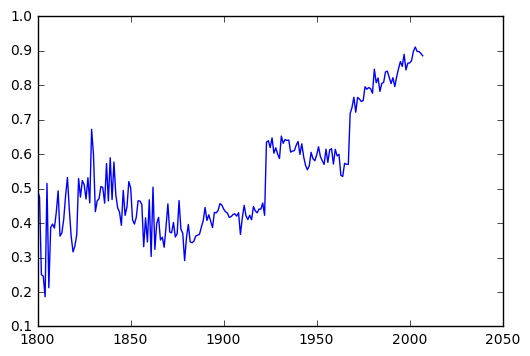

In [12]:
x = []
y = []
for i in range(1800, 2008):
    if i in alltitles and alltitles[i] > 0:
        ratio = fictiontitles[i] / alltitles[i]
    else:
        ratio = 0
    x.append(i)
    y.append(ratio)
plt.plot(x, y)

In [13]:
master = pd.read_csv('../masterficmetadata.tsv', sep = '\t', index_col = 'docid', low_memory=False)

In [14]:
master.columns

Index(['oldauthor', 'author', 'authordate', 'inferreddate', 'latestcomp',
       'datetype', 'startdate', 'enddate', 'imprint', 'imprintdate',
       'contents', 'genres', 'subjects', 'geographics', 'locnum', 'oclc',
       'place', 'recordid', 'enumcron', 'volnum', 'title', 'parttitle',
       'shorttitle'],
      dtype='object')

In [16]:
alltitles = Counter()
fictiontitles = Counter()
ficclues = {'Fiction', 'Novel', 'Short stories', 'Domestic fiction', 'Love stories', 
            'Historical fiction', 'Psychological fiction', "Detective and mystery stories"}
for index, row in master.iterrows():
    date = int(row.latestcomp)
    alltitles[date] += 1
    
    if pd.isnull(row.genres):
        continue
    g = set(row.genres.split('|'))
    fiction = False
    for genre in g:
        if genre in ficclues:
            fiction = True
            break
    if fiction:
        fictiontitles[date] += 1

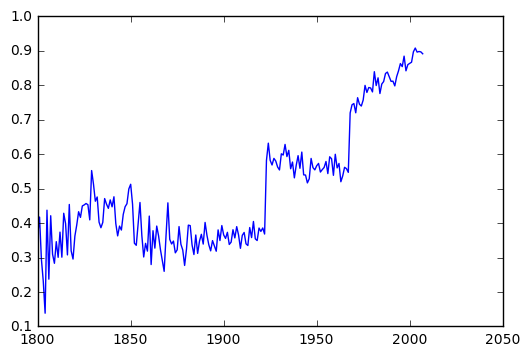

In [17]:
x = []
y = []
for i in range(1800, 2008):
    if i in alltitles and alltitles[i] > 0:
        ratio = fictiontitles[i] / alltitles[i]
    else:
        ratio = 0
    x.append(i)
    y.append(ratio)
plt.plot(x, y)

In [19]:
[x1 for x1 in zip(x, y)]

[(1800, 0.3645833333333333),
 (1801, 0.4175824175824176),
 (1802, 0.29508196721311475),
 (1803, 0.23170731707317074),
 (1804, 0.13846153846153847),
 (1805, 0.4375),
 (1806, 0.23728813559322035),
 (1807, 0.42138364779874216),
 (1808, 0.30973451327433627),
 (1809, 0.2833333333333333),
 (1810, 0.34615384615384615),
 (1811, 0.3006993006993007),
 (1812, 0.37383177570093457),
 (1813, 0.3010752688172043),
 (1814, 0.42857142857142855),
 (1815, 0.3983739837398374),
 (1816, 0.3076923076923077),
 (1817, 0.4541176470588235),
 (1818, 0.3194444444444444),
 (1819, 0.2956521739130435),
 (1820, 0.36231884057971014),
 (1821, 0.3944954128440367),
 (1822, 0.4330357142857143),
 (1823, 0.4166666666666667),
 (1824, 0.4497816593886463),
 (1825, 0.4528301886792453),
 (1826, 0.45692883895131087),
 (1827, 0.453416149068323),
 (1828, 0.40942028985507245),
 (1829, 0.5525672371638142),
 (1830, 0.5132275132275133),
 (1831, 0.46357615894039733),
 (1832, 0.4758485639686684),
 (1833, 0.4027777777777778),
 (1834, 0.3865

In [20]:
import seaborn as sns
sns.set()

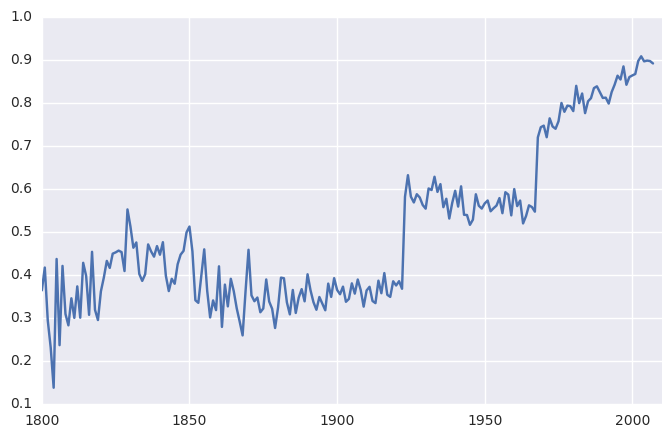

In [37]:
toplot = pd.DataFrame({'date': x, 'labeled': y})
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (8, 5))
ax = plt.plot(x, y)
plt.xlim(1800, 2010)
plt.savefig('percentlabeledfic.png', bbox_inches = 'tight')
plt.show()

In [39]:
work.shape

(138137, 27)